## <잡플래닛 크롤링 프로젝트>

### 1. 주제
- 잡플래닛의 데이터사이언스 관련 채용 공고 + 해당 기업의 리뷰 수집


### 2. 수집 동기
- 데이터 사이언스 분야로 취업하는 데 도움이 되는 정보를 수집하기 위해서.
- 채용 공고의 기업 소개는 회사에서 작성한 것으로, 실제의 회사의 기업문화를 알기 어렵다. 그런데, 취업공고와 기업리뷰를 한번에 볼 수 있다면, 지원할 회사를 선택할 때 참고할 수 있다.  

### 3. 데이터
- 채용공고
    - 링크, 회사이름, 산업분야, 공고제목, 채용기간, 기업소개
- 기업리뷰
    - 링크, 리뷰내용, 전체리뷰통계, 총리뷰수, 리뷰작성자 직군

In [1]:
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

In [2]:
info_df = pd.read_csv("info_p1.csv")
info_df.head(1)

,corp,title,period,industry,corp_int,task,treat,ability,process,etc,link
0,(주)로아컨설팅,[(주)로아컨설팅] 컨설턴트 모집,2020.03.13 09:00 ~ 2020.04.30 24:00 D-48 (채용시 마감),IT/웹/통신,"ROA Consulting은 지난 17년간 SK, LG, 롯데, 한화 등 유수의 I...",- 국내 주요 대기업 비즈니스 컨설팅 업무 협업/- 디지털 및 플랫폼 비즈니스 관련...,"- 테크 자이언트(애플, 구글, 마이크로소프트, 페이스북, 아마존) 등에 대해 높은...","- 디지털, IT 테크, 플랫폼, 비즈니스 모델, 스타트업 등에 대해 높은 관심을 ...",- 1차 : 서류전형/- 2차 : 사전 과제 (1페이지 보고서 작성)/- 3차 : ...,"- 자율적 업무환경 (위워크 사무실, 라운지/부스 원하는 곳에서 업무 가능)/- 국...",['https://www.jobplanet.co.kr/companies/78749/...


In [3]:
review_df = pd.read_csv("review_p1.csv")
review_df.head(1)

,company_id,name,stats,num,person,title,weakness,strength
0,78749,(주)로아컨설팅,"{'복지 및 급여': 2.6, '업무와 삶의 균형': 2.4, '사내문화': 2.6...",5,"['경영/기획/컨설팅', '전직원', '서울', '2019. 08. 13']","""다양한 업무를 할 수 있음. 소규모 회사인데도 라인타고 뒷얘기 많은 회사"" ""딱히...",단체로 움직이는걸 좋아함. 빠지게 되면 욕먹음. 사적인 부분이 괴로움출근이 늦다보니...,일년에 한번 해외여행. 복지에 신경 많이 쓰는 편. 칼퇴 하는 편. 출근 시간이 다...


### 4. 크롤링 방법
- Json
    - 기업리뷰
        - 전체 리뷰 통계 

- BeautifulSoup
    -  기업리뷰
        - 기업 리뷰 개수
        - 작성자의 직군
- Xpath 
    - 채용공고
        - 공고 컨텐츠 페이지

In [4]:
from IPython.display import Image
info1 = Image("Image/채용공고1.jpg", width=700, height=200)
info2 = Image("Image/채용공고2.jpg", width=700, height=200)
review1 = Image("Image/기업리뷰1.jpg", width=700, height=200)
review2 = Image("Image/기업리뷰2.png", width=1400, height=200)
review3 = Image("Image/기업리뷰3.jpg", width=700, height=200)
mongo= Image("Image/몽고디비.png", width=1000, height=200)
mongo2= Image("Image/몽고디비2.png", width=1000, height=200)
Initspider= Image("Image/initspider.png", width=1000, height=200)
want_flask= Image("Image/want_flask.png", width=1000, height=200)


### 채용공고

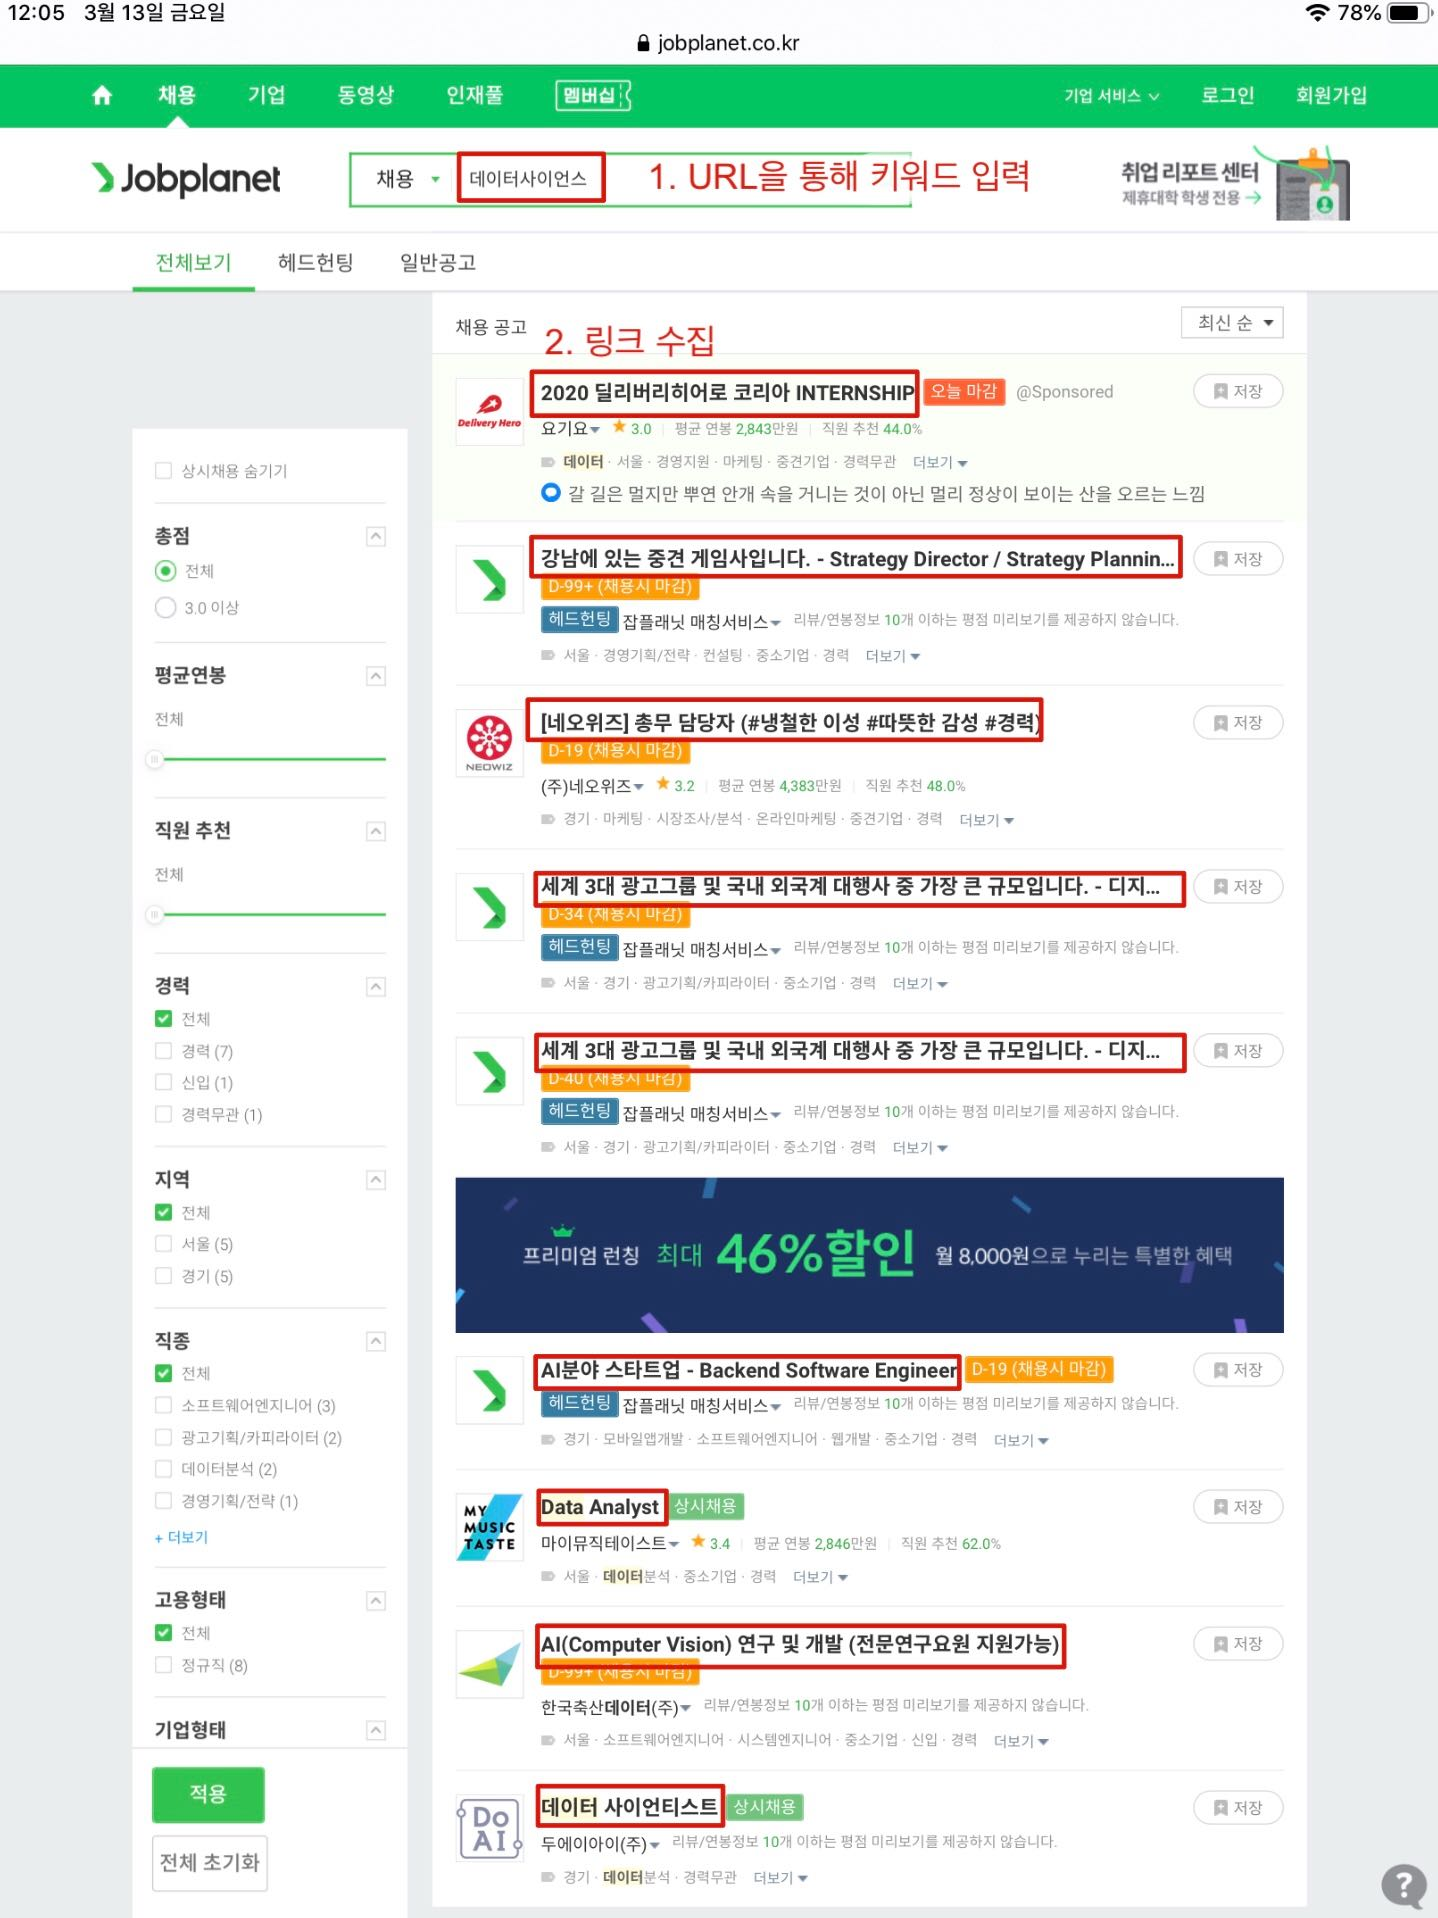

In [5]:
info1

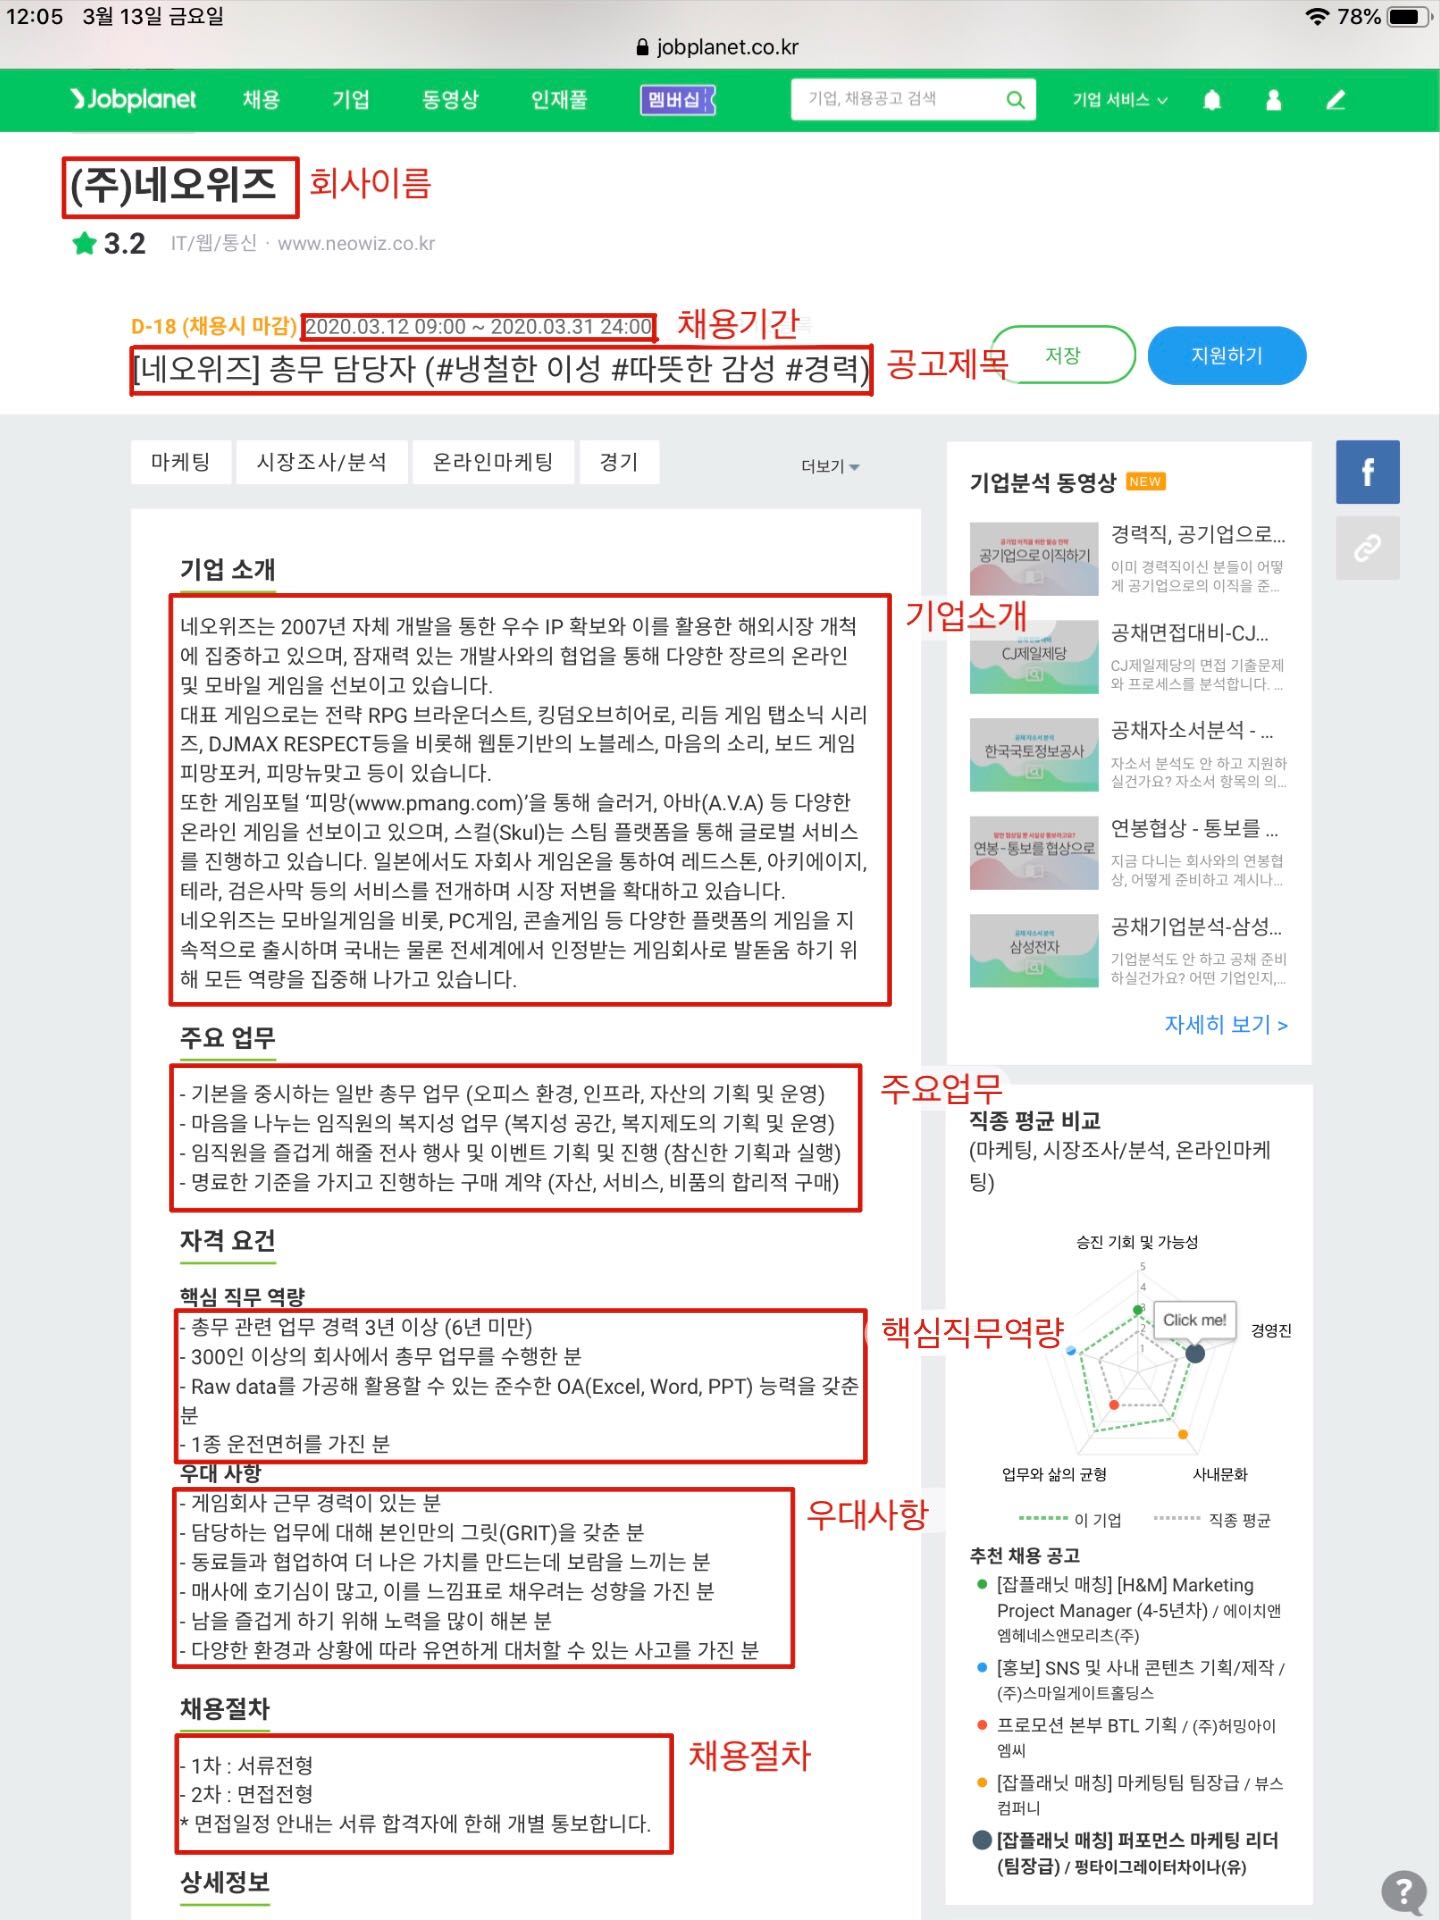

In [6]:
info2

### 기업리뷰

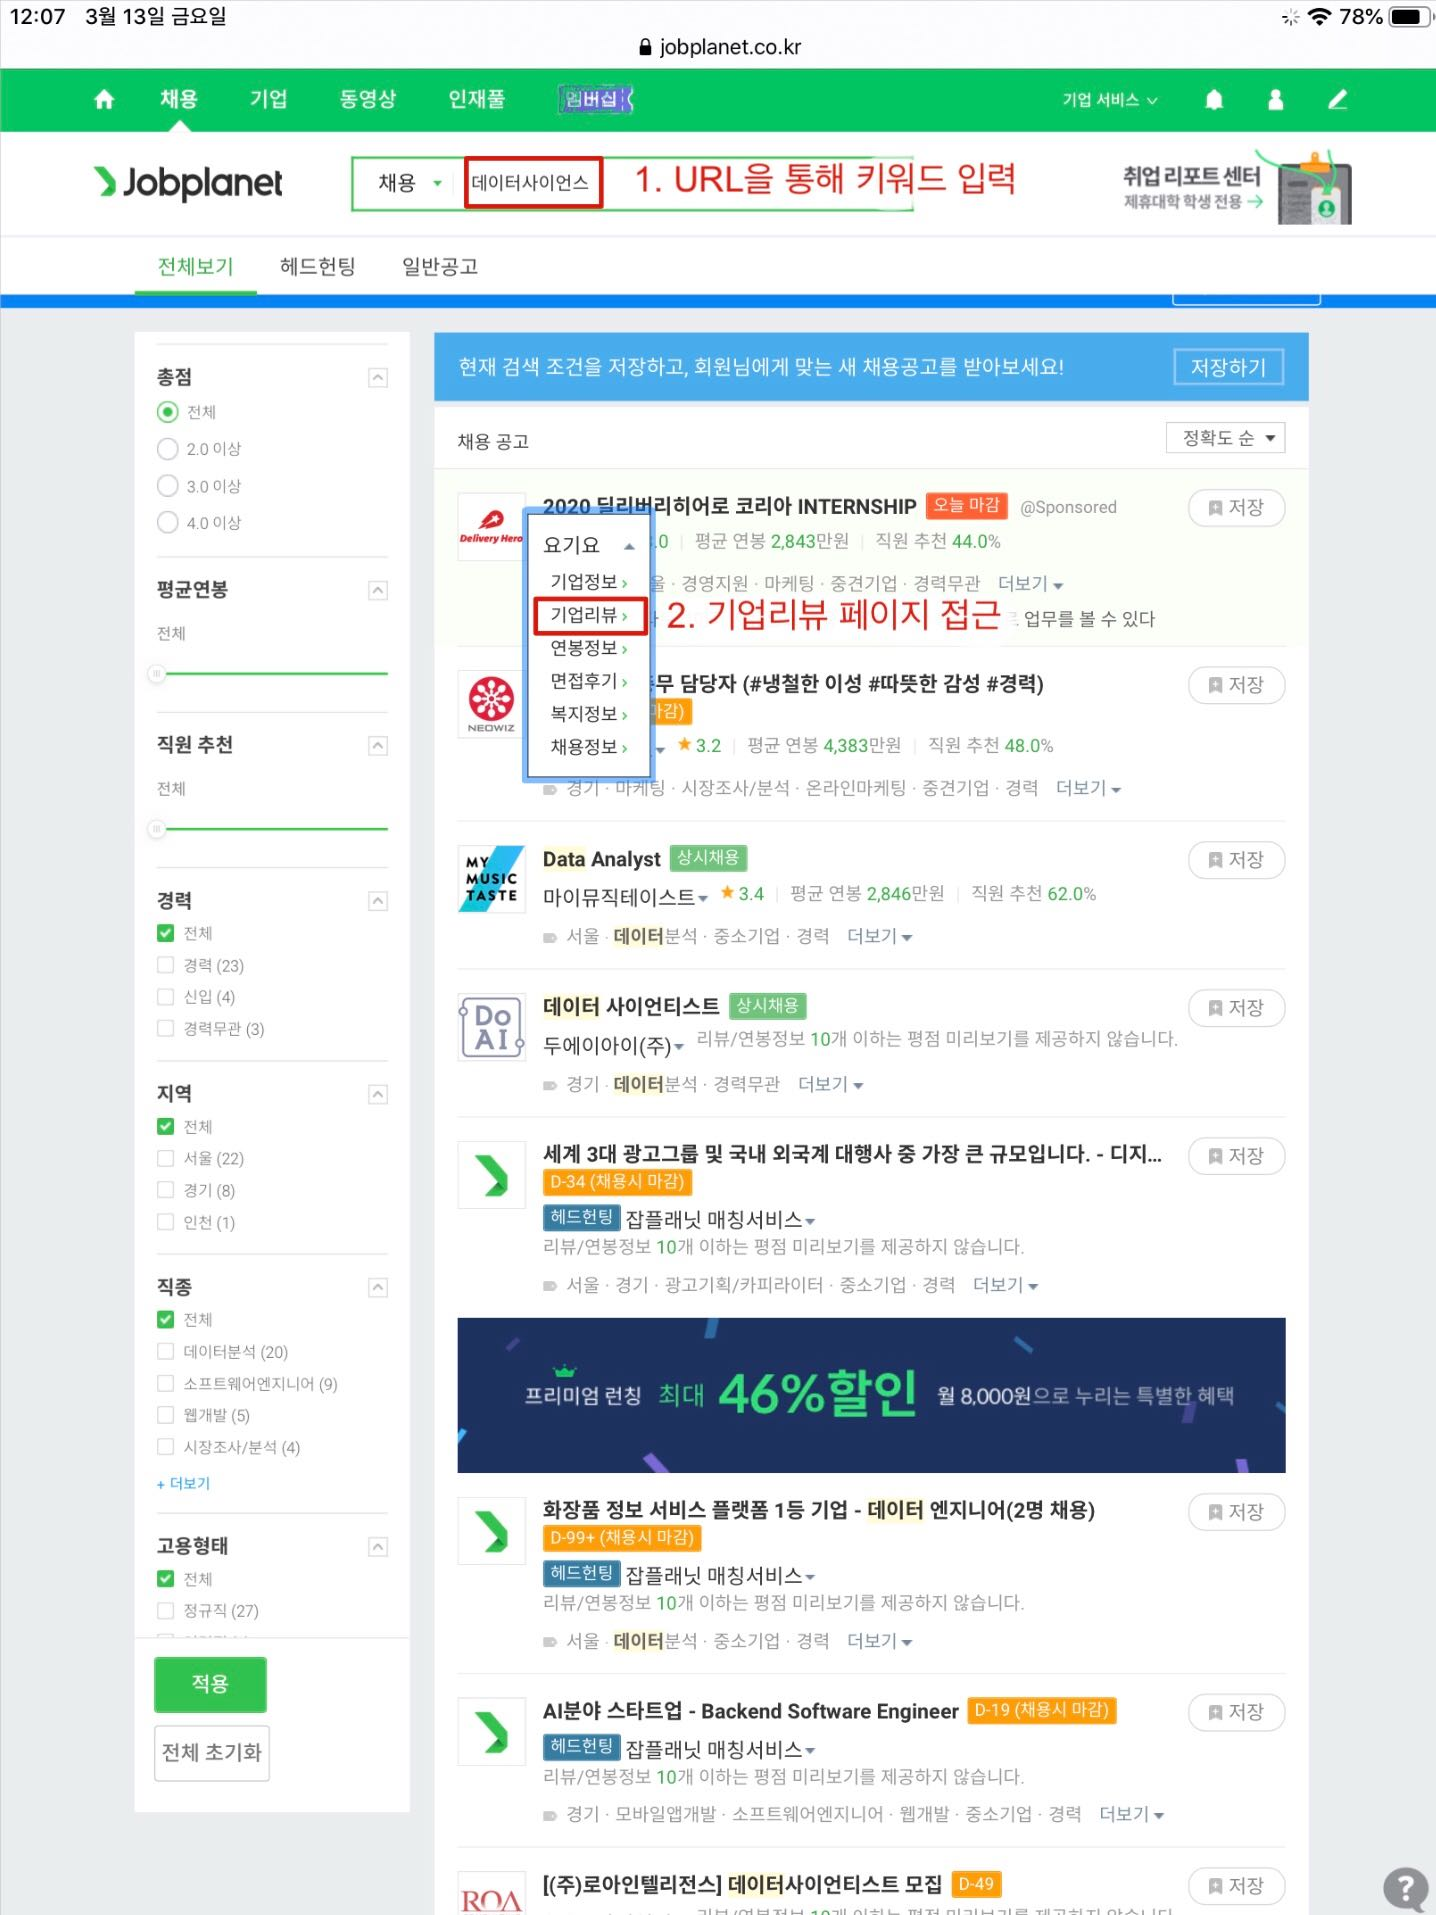

In [7]:
review1

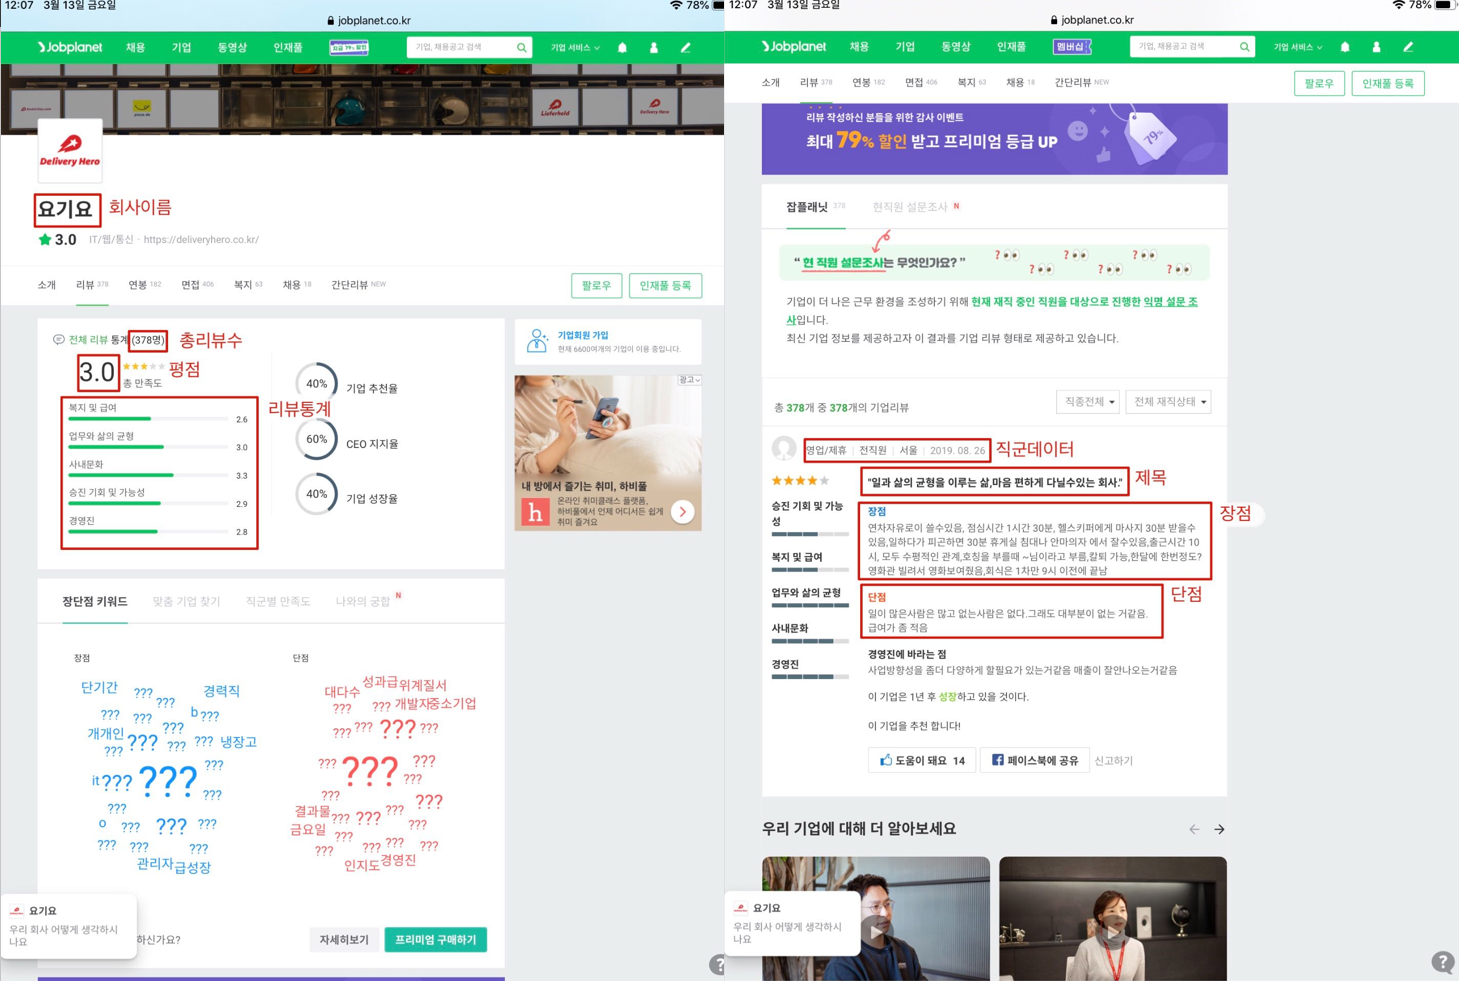

In [8]:
review2

### 스크래피

- 스크래피를 사용하지 않은 이유
: 로그인 유지 (initspider, middlewares 수정 시도 .. -> fail) : Requests.session 을 사용하며 모듈로 구현!


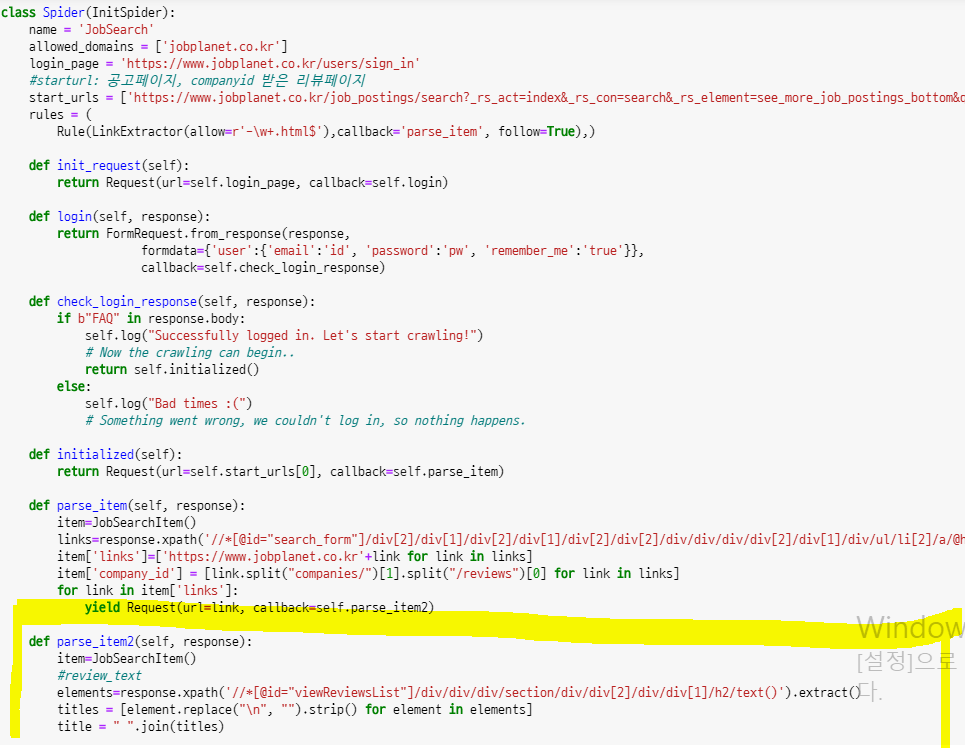

In [9]:
Initspider

### 모듈생성

In [10]:
%%writefile job_planet_review_func.py 
from review_mongodb import collection_r
from info_mongodb import collection_i
import requests
from scrapy.http import TextResponse
from bs4 import BeautifulSoup
import pandas as pd


class JobPlanet():

    def __init__(self,query='데이터사이언스',page=1):    
        #start_url
        self.start_url = 'https://www.jobplanet.co.kr/job_postings/search?_rs_act=index&_rs_con=search&_rs_element=see_more_job_postings_bottom&query={}&page={}'.format(query,page)  
    
    def get_reviews(self):
        #로그인한 session생성-> 리뷰페이지links 수집
        login_url = 'https://www.jobplanet.co.kr/users/sign_in'
        login_data = {'user':{'email':'ID', 'password':'PW', 'remember_me':'true'}}
        session = requests.session()
        req = session.post(login_url, json = login_data) 
        req = session.get(self.start_url)
        response=TextResponse(req.url, body=req.text, encoding='utf-8')
        
        #links(review 페이지) & company_id
        links=response.xpath('//*[@id="search_form"]/div[2]/div[1]/div[2]/div[1]/div[2]/div[2]/div/div/div/div[2]/div[1]/div/ul/li[2]/a/@href').extract()
        links=['https://www.jobplanet.co.kr'+link for link in links]
        company_ids = [link.split("companies/")[1].split("/reviews")[0] for link in links]
        
        #session을 이용해서 각 link에 접근
        title_ls,strength_ls,weakness_ls,want_ls=[],[],[],[]
        for link in links:
            req = session.get(link)
            response=TextResponse(req.url, body=req.text, encoding='utf-8')
            
            #review_text
            elements=response.xpath('//*[@id="viewReviewsList"]/div/div/div/section/div/div[2]/div/div[1]/h2/text()').extract()
            titles = [element.replace("\n", "").strip() for element in elements]
            title = " ".join(titles)
            title_ls.append(title)
            
            elements=response.xpath('//*[@id="viewReviewsList"]/div/div/div/section/div/div[2]/div/dl/dd[1]/span/text()').extract()
            strengths = [element.replace("\n", "").replace("\r","").strip() for element in elements]
            strength = " | ".join(strengths)
            strength_ls.append(strength)
            
            elements=response.xpath('//*[@id="viewReviewsList"]/div/div/div/section/div/div[2]/div/dl/dd[2]/span/text()').extract()
            weakness = [element.replace("\n", "").replace("\r","").strip() for element in elements]
            weakness = " | ".join(weakness)
            weakness_ls.append(weakness)
            
            elements=response.xpath('//*[@id="viewReviewsList"]/div/div/div/section/div/div[2]/div/dl/dd[3]/span/text()').extract()
            wants = [element.replace("\n", "").replace("\r","").strip() for element in elements]
            want = " | ".join(wants)
            want_ls.append(want)
            
        #stats
        stats_ls=[]
        for company_id in company_ids:
            url = "https://www.jobplanet.co.kr/api/v3/companies/reviews/premium_rating?company_id={}".format(company_id)
            response = requests.get(url)
            contents = response.json()["data"]["contents"]
            items = contents[0]["graph_data"]["bar_data"]["items"]
            stats = {}
            for item in items:
                stats[item["label"]] = item["val"]
            stats_ls.append(stats)
    
        #review_num
        review_num_ls,person_ls,name_ls=[],[],[]
        for link in links:
            url = link
            response = requests.get(url)
            dom = BeautifulSoup(response.content, "html.parser")
            review_num = dom.select_one("#viewReviewsTitle > .num").text
            review_num_ls.append(review_num)
        #person
            try:
                datas = dom.select_one(".content_top_ty2").text
                person = [data.strip() for data in datas.split("|")]
                person_ls.append(person)
            except:
                person_ls.append("")
        #name
            name = dom.select_one("div.company_name > h1 > a").text
            name_ls.append(name)
            
        #company_ids = [link.split("companies/")[1].split("/reviews")[0] for link in links]        
        dic={'name':name_ls,'stats':stats_ls,'review_num':review_num_ls,'person':person_ls,\
            'title':title_ls,'strength':strength_ls,'weakness':weakness_ls,'want':want_ls,'stats':stats_ls, 'link':links} 
        df=pd.DataFrame(dic)
        return df
    
    def get_recruit(self):
        login_url = 'https://www.jobplanet.co.kr/users/sign_in'
        login_data = {'user':{'email':'dyfltkwngus@naver.com', 'password':'dss12345', 'remember_me':'true'}}
        session = requests.session()
        req = session.post(login_url, json=login_data)
        req = session.get(self.start_url)
        response=TextResponse(req.url, body=req.text, encoding='utf-8')
        link_ = response.xpath('//*[@id="search_form"]/div[2]/div[1]/div[2]/div[1]/div[2]/div[2]/div/div/div/div[1]/a/@href').extract()
        links = list(map(lambda x: 'https://www.jobplanet.co.kr' + x, link_))
        pages = response.xpath('//*[@id="search_form"]/div[2]/div[1]/div[2]/div[2]/div/article/a/text()').extract()
        pages = list(map(lambda x: int(x), pages))
        
        for page in pages:
            start_url = 'https://www.jobplanet.co.kr/job_postings/search?_rs_act=index&_rs_con=search&_rs_element=see_more_job_postings_bottom&order_by=recent&query={}&page={}'.format(keyword, page)
            req = session.get(start_url)
            response=TextResponse(req.url, body=req.text, encoding='utf-8')
            link_p = response.xpath('//*[@id="search_form"]/div[2]/div[1]/div[2]/div[1]/div[2]/div[2]/div/div/div/div[1]/a/@href').extract()
            linkp = list(map(lambda x: 'https://www.jobplanet.co.kr' + x, link_p))
            links += linkp
        
        for link in links:
            url = link
            req = requests.get(url)
            response = TextResponse(req.url, body=req.text, encoding='utf-8')
            corp_id = url.split(sep='/')[4]
            corp_name = response.xpath('/html/body/div[5]/div[2]/div[1]/div/div/div/div[2]/div/div/div[1]/div[2]/div[1]/h1/a/text()')[0].extract().strip()
            industry = response.xpath('/html/body/div[5]/div[2]/div[1]/div/div/div/div[2]/div/div/div[1]/div[2]/div[2]/div[2]/span[1]/text()')[0].extract()
            title = response.xpath('/html/body/div[5]/div[2]/div[2]/div[1]/div/div/div[1]/h1/text()')[0].extract().strip()
            period1 = response.xpath('/html/body/div[5]/div[2]/div[2]/div[1]/div/div/div[1]/span/span[1]/text()')[0].extract()
            period2 = response.xpath('/html/body/div[5]/div[2]/div[2]/div[1]/div/div/div[1]/span/span[2]/text()')[0].extract()
            period = period1 if (period1 == '상시채용') else period2 + " " + period1
            xpath = '/html/body/div[5]/div[2]/div[2]/div[2]/div[1]/div/div[2]'
            corp_int = response.xpath(f'{xpath}/div[2]/div/text()').extract()
            corp_int = '/'.join(corp_int).strip().replace('\r', '')
            task = response.xpath(f'{xpath}/div[3]/div/text()').extract()
            task = '/'.join(task).strip().replace('\r', '')
            ability = response.xpath(f'{xpath}/div[4]/div[1]/li/span/text()').extract()
            ability = '/'.join(ability).strip().replace('\r', '')
            treat = response.xpath(f'{xpath}/div[4]/div[2]/text()').extract()
            treat = '/'.join(treat).strip().replace('\r', '')
            process = response.xpath(f'{xpath}/div[5]/div/text()').extract()
            process = '/'.join(process).strip().replace('\r', '')
            etc = response.xpath(f'{xpath}/div[5]/div/text()').extract()
            etc = '/'.join(etc).strip().replace('\r', '')
            datas.append({
                'corp_id': corp_id,
                'corp_name': corp_name,
                'industry': industry,
                'title': title, 
                'period': period,
                'corp_int': corp_int, 
                'task': task, 
                'ability': ability, 
                'treat': treat, 
                'process': process, 
                'etc': etc,
                'link': link
            })
        col = ['corp_id', 'corp_name', 'title', 'period', 'industry', 'corp_int', 'task', 'treat', 'ability', 'process', 'etc', 'link']
        return pd.DataFrame(datas)[col]
    
    def save_review_mongodb(self):
        df=self.get_reviews()
        collection_r.insert_many(df.to_dict('records'))
    
    def save_info_mongodb(self):
        df=self.get_recruit()
        collection_i.insert_many(df.to_dict('records'))

Overwriting job_planet_review_func.py


### 5. 몽고디비에 저장

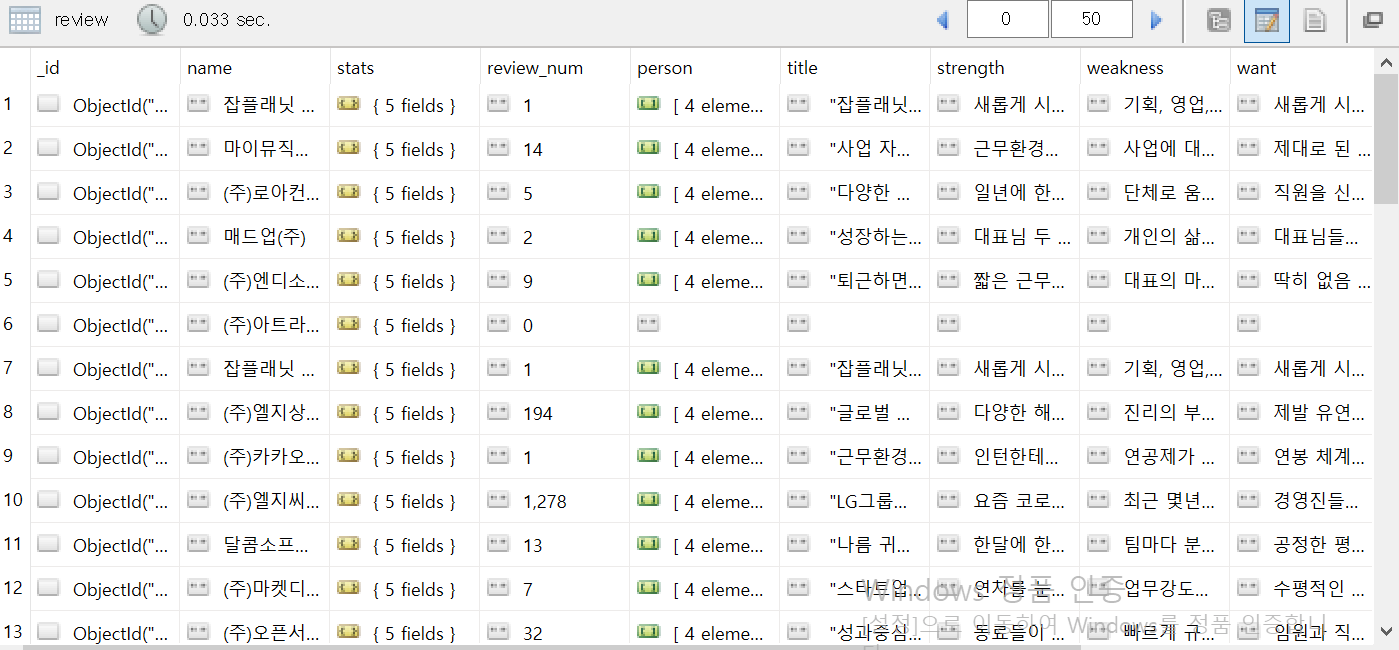

In [11]:
mongo

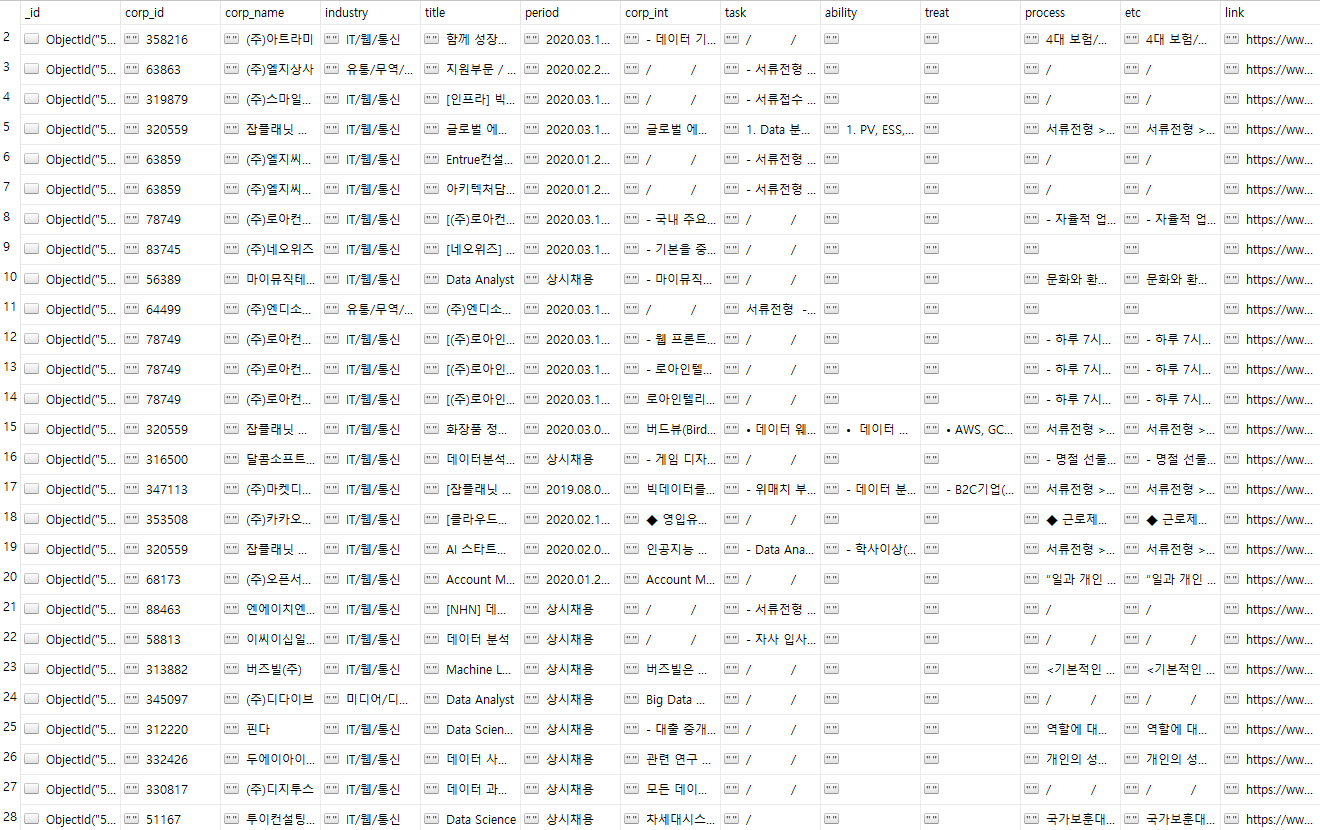

In [12]:
mongo2

### 6. 아쉬운 점

- 서비스화 : Flask를 이용하여 HTML화면으로 기업 공고 및 리뷰를 보고서 형식으로 출력

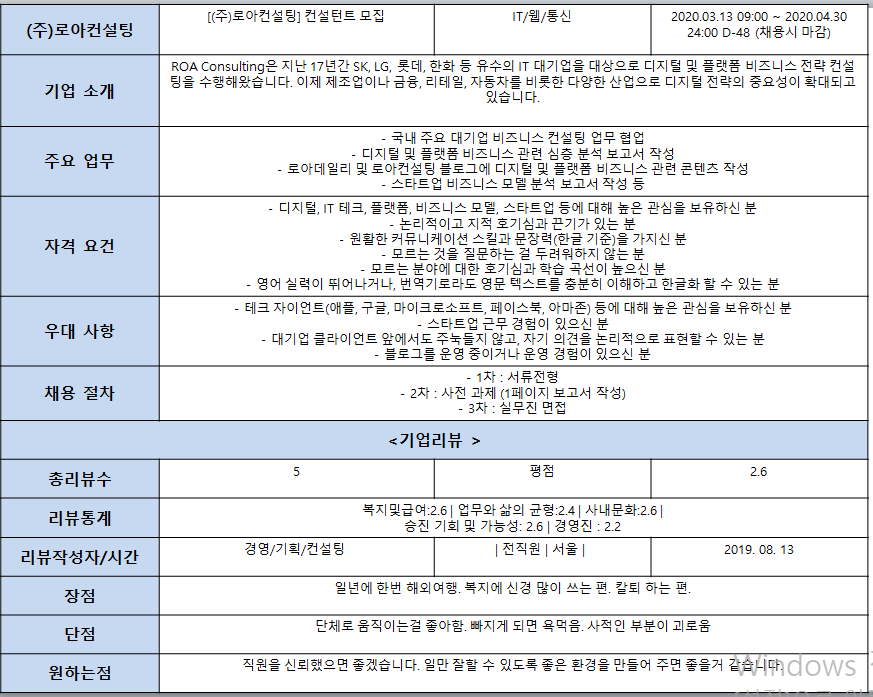

In [13]:
want_flask